<a href="https://colab.research.google.com/github/renanamd/analise_vinijr/blob/main/analise_vinijr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de Desempenho - Vinicius Jr Copa América 2024

In [110]:
!pip install pandas statsbombpy mplsoccer matplotlib

In [154]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [112]:
# IDs das partidas
match_ids = [3939976, 3939983, 3939991, 3942415]

In [113]:
def get_player_events(match_ids, player_name):
    all_events = []
    for match_id in match_ids:
        events = sb.events(match_id)
        player_events = events[events['player'] == player_name]
        all_events.append(player_events)
    return pd.concat(all_events, ignore_index=True)

player_name = "Vinícius José Paixão de Oliveira Júnior"
vinicius_events = get_player_events(match_ids, player_name)

In [166]:
chutes = vinicius_events[vinicius_events['type'] == 'Shot']
passes = vinicius_events[vinicius_events['type'] == 'Pass']
dribles = vinicius_events[vinicius_events['type'] == 'Dribble']
conducoes = vinicius_events[vinicius_events['type'] == 'Carry']
faltas_sofridas = vinicius_events[vinicius_events['type'] == 'Foul Won']

Vinicius Jr deu 4 chutes na competição 

O xG(Expected Gols) de Vinicius Jr foi 0.73



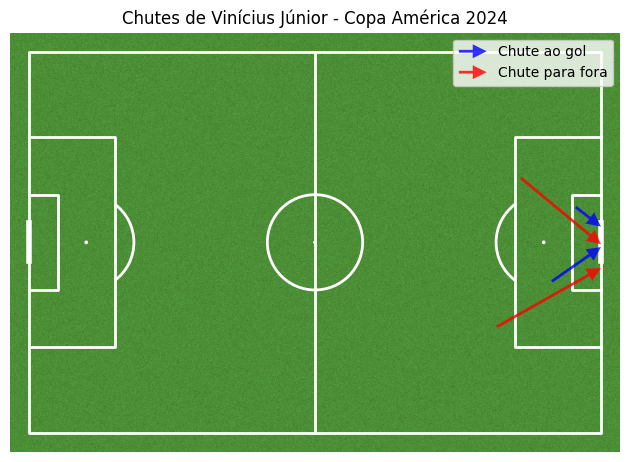

In [147]:
total_chutes = len(chutes)
total_xg = chutes['shot_statsbomb_xg'].sum()

print("Vinicius Jr deu " + str(total_chutes) + " chutes na competição \n")
print("O xG(Expected Gols) de Vinicius Jr foi " + str(round(total_xg, 2)) + "\n")

# Análise Detalhada dos Chutes

# Criar o campo de futebol
pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color='grass')
fig, ax = pitch.draw()


# Chutes no gol
chute_ao_gol = chutes[chutes['shot_outcome'] == 'Goal']
# Chutes para fora
chute_para_fora = chutes[chutes['shot_outcome'] == 'Off T']

# Criar setas de chutes ao gol no campo
pitch.arrows(chute_ao_gol['location'].apply(lambda x: x[0]),
             chute_ao_gol['location'].apply(lambda x: x[1]),
             chute_ao_gol['shot_end_location'].apply(lambda x: x[0] if x is not None else x),
             chute_ao_gol['shot_end_location'].apply(lambda x: x[1] if x is not None else x),
             alpha=0.8, color='blue', width=2, headwidth=5, headlength=5, headaxislength=5, ax=ax, label='Chute ao gol')

# # Criar setas de chutes para fora no campo
pitch.arrows(chute_para_fora['location'].apply(lambda x: x[0]),
             chute_para_fora['location'].apply(lambda x: x[1]),
             chute_para_fora['shot_end_location'].apply(lambda x: x[0] if x is not None else x),
             chute_para_fora['shot_end_location'].apply(lambda x: x[1] if x is not None else x),
             alpha=0.8, color='red', width=2, headwidth=5, headlength=5, headaxislength=5, ax=ax, label='Chute para fora')

# Adicionar uma legenda
ax.legend()

plt.title('Chutes de Vinícius Júnior - Copa América 2024')
plt.show()

Vinícius Jr tentou 69 passes na competição, sendo eles 37 curtos e 32 longos 



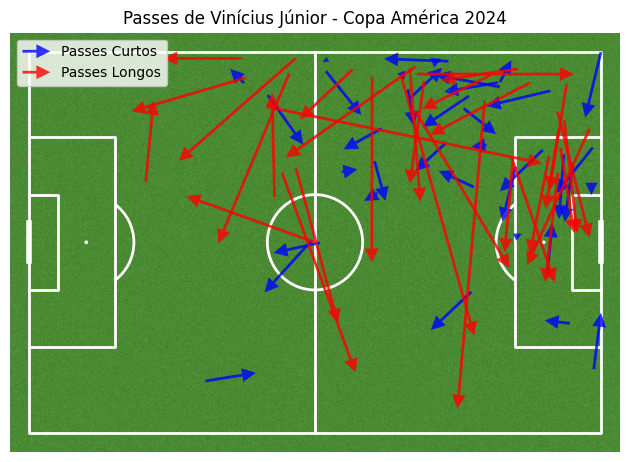

In [148]:
total_passes = len(passes)

passes_curtos = passes[passes['pass_length'] <= 15]
passes_longos = passes[passes['pass_length'] > 15]

print("Vinícius Jr tentou 69 passes na competição, sendo eles " + str(len(passes_curtos)) + " curtos e " + str(len(passes_longos)) + " longos \n")

# Criar o campo de futebol
pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color='grass')
fig, ax = pitch.draw()

pitch.arrows(passes_curtos['location'].apply(lambda x: x[0]),
             passes_curtos['location'].apply(lambda x: x[1]),
             passes_curtos['pass_end_location'].apply(lambda x: x[0] if x is not None else x),
             passes_curtos['pass_end_location'].apply(lambda x: x[1] if x is not None else x),
             alpha=0.8, color='blue', width=2, headwidth=5, headlength=5, headaxislength=5, ax=ax, label='Passes Curtos')

pitch.arrows(passes_longos['location'].apply(lambda x: x[0]),
             passes_longos['location'].apply(lambda x: x[1]),
             passes_longos['pass_end_location'].apply(lambda x: x[0] if x is not None else x),
             passes_longos['pass_end_location'].apply(lambda x: x[1] if x is not None else x),
             alpha=0.8, color='red', width=2, headwidth=5, headlength=5, headaxislength=5, ax=ax, label='Passes Longos')

# Adicionar uma legenda
ax.legend()

plt.title('Passes de Vinícius Júnior - Copa América 2024')
plt.show()


Vinícius Jr tentou fazer 22 dribles, sendo eles 6 completos e 16 incompletos 

O jogador teve um aproveitamento de 27.27% em dribles 



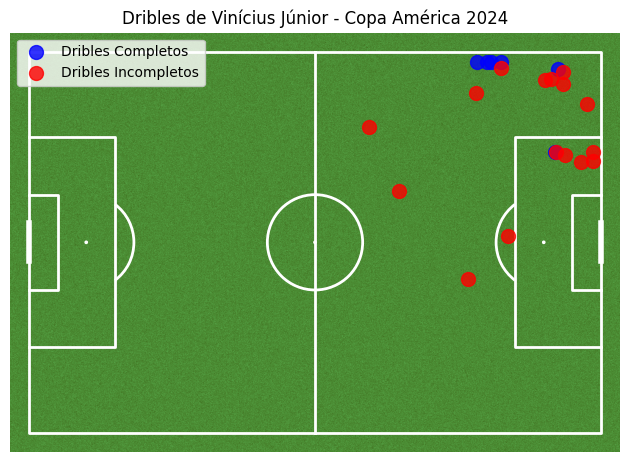

In [149]:
total_dribles = len(dribles)
dribles_completos = (dribles[dribles['dribble_outcome'] == 'Complete'])
dribles_incompletos = (dribles[dribles['dribble_outcome'] == 'Incomplete'])

print("Vinícius Jr tentou fazer " + str(total_dribles) + " dribles, sendo eles " + str(len(dribles_completos)) + " completos e " + str(len(dribles_incompletos)) + " incompletos \n")

aproveitamento_dribles = len(dribles_completos) / total_dribles
print("O jogador teve um aproveitamento de " + str(round(aproveitamento_dribles * 100, 2)) + "% em dribles \n")


pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color='grass')
fig, ax = pitch.draw()

pitch.scatter(dribles_completos['location'].apply(lambda x: x[0]),
              dribles_completos['location'].apply(lambda x: x[1]),
              alpha=0.8, color='blue', s=100, ax=ax, label='Dribles Completos')

# Plotar dribles incompletos (em vermelho)
pitch.scatter(dribles_incompletos['location'].apply(lambda x: x[0]),
              dribles_incompletos['location'].apply(lambda x: x[1]),
              alpha=0.8, color='red', s=100, ax=ax, label='Dribles Incompletos')

# Adicionar uma legenda
ax.legend()

plt.title('Dribles de Vinícius Júnior - Copa América 2024')
plt.show()


Vinícius Jr tentou fazer 99 conduções 



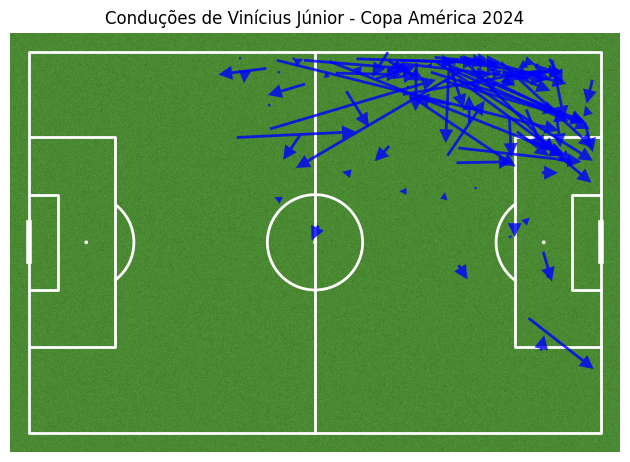

In [146]:
total_conducoes = len(conducoes)
print("Vinícius Jr tentou fazer " + str(total_conducoes) + " conduções \n")


pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color='grass')
fig, ax = pitch.draw()

pitch.arrows(conducoes['location'].apply(lambda x: x[0]),
             conducoes['location'].apply(lambda x: x[1]),
             conducoes['carry_end_location'].apply(lambda x: x[0] if x is not None else x),
             conducoes['carry_end_location'].apply(lambda x: x[1] if x is not None else x),
             alpha=0.8, color='blue', width=2, headwidth=5, headlength=5, headaxislength=5, ax=ax)

plt.title('Conduções de Vinícius Júnior - Copa América 2024')
plt.show()




Vinícius Jr sofreu 8 faltas na competição 



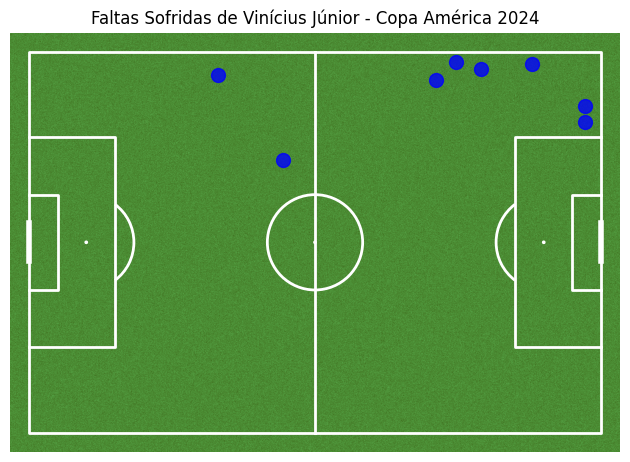

In [145]:
total_faltas_sofridas = len(faltas_sofridas)
print("Vinícius Jr sofreu " + str(total_faltas_sofridas) + " faltas na competição \n")

pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color='grass')
fig, ax = pitch.draw()

pitch.scatter(faltas_sofridas['location'].apply(lambda x: x[0]),
              faltas_sofridas['location'].apply(lambda x: x[1]),
              alpha=0.8, color='blue', s=100, ax=ax, label='Dribles Completos')

plt.title('Faltas Sofridas de Vinícius Júnior - Copa América 2024')
plt.show()

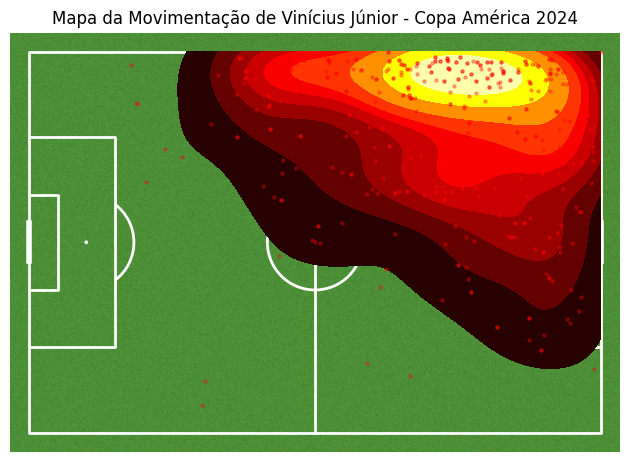

In [162]:
locations = vinicius_events['location'].dropna().tolist()

x_coords = [loc[0] for loc in locations]
y_coords = [loc[1] for loc in locations]

# Criar o campo de futebol
pitch = Pitch(pitch_type='statsbomb', line_color='white', pitch_color='grass')
fig, ax = pitch.draw()

# Gerar o mapa de calor usando as coordenadas
bin_statistic = pitch.bin_statistic(x_coords, y_coords, statistic='count', bins=(200,200))
# Gerar o mapa de densidade usando as coordenadas
density = pitch.kdeplot(x_coords, y_coords, ax=ax, fill=True, cmap='hot', shade_lowest=False)


# Adicionar a densidade de movimentos no campo
pitch.scatter(x_coords, y_coords, alpha=0.3, color='red', ax=ax, s=5)

# Título do gráfico
plt.title('Mapa da Movimentação de Vinícius Júnior - Copa América 2024')

# Exibir o gráfico
plt.show()


0
